<a href="https://colab.research.google.com/github/FunmilolaAdetuwo/Research-Methods-7PAM2015-Large-Language-models-LLMs-Assignment/blob/main/LLM_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Yelp Polarity Dataset**

##**INTRODUCTION**

Understanding client feedback rapidly and properly can make a big impact in today's fast-paced corporate environment. Large Language Models (LLMs) are especially effective in this sense because of its' exceptional speed and accuracy in processing large volumes of text data, such as Yelp reviews. In contrast to conventional techniques that necessitate laborious sorting and analysis, LLMs can instantly recognise trends and patterns from thousands of reviews. Because of its efficiency, firms are able to anticipate trends and respond to customer needs faster. Businesses can improve customer satisfaction and loyalty by employing LLMs to make sure their services are not merely meeting but surpassing consumer expectations.
In this task, the dataset that will be used is the Yelp Polarity Dataset. The dataset has a collection of over 500,000 customer reviews from Yelp, which are categorised into either positive or negative. The customer review was based on experiences of various local businesses such as shops, hotels, restuarant as well as other service providers.





In [ ]:
# installing the tools that will be used for building, fine-tuning and deploying LLMs when working with Natural language processing dataset

!pip install transformers datasets torch


In [ ]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from wordcloud import WordCloud
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split



In [ ]:
# setting up the code that ensures that the Dataframe is displayed in a pandas output

pd.options.display.max_columns = None
pd.options.display.max_rows = 20


## **Methodology**

The goal of this task is to use the Yelp Polarity Dataset to optimise a Large Language Model (LLM) for sentiment analysis. The methodology is meticulously crafted to adhere to a strict and structured process, combining advanced machine learning methods with well established Natural Language Processing (NLP) process. This aligns with the principles outlined by Devlin et al. (2019), who emphasize the the significance of fine-tuning pre-trained models like BERT for certain downstream tasks. The steps below are used to achieve the goals.

**1. Gathering and Loading the dataset**

 The Yelp Polarity Dataset is sourced from the Yelp Dataset, which is on the Hugging Face Datasets Hub. It contains customer reviews which is either positive or negative. Then, the dataset was loaded using the 'datasets' libraries from Huggingface.

 **2. Preparation of Data**

To gain an understanding of the structure and contents of the dataset, we will display the first few rows using .head(), after it has been loaded. In order to understand the data, including the distribution of labels and the type of reviews, this stage is essential.
To make manipulation and exploration easier, we will transform the dataset into a Pandas DataFrame. Because Pandas has so many capabilities for preprocessing and data analysis, and so this conversion is required.





In [ ]:
# Let's load the Yelp Polarity Dataset
dt = load_dataset("yelp_polarity")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/560000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/38000 [00:00<?, ? examples/s]

In [ ]:
# then, we will convert the training and test data to a Pandas DataFrame
trn_dt = pd.DataFrame(dt['train'])
tst_dt = pd.DataFrame(dt['test'])

In [ ]:
# showing the few rows of the training dataset
print(trn_dt.head())

                                                text  label
0  Unfortunately, the frustration of being Dr. Go...      0
1  Been going to Dr. Goldberg for over 10 years. ...      1
2  I don't know what Dr. Goldberg was like before...      0
3  I'm writing this review to give you a heads up...      0
4  All the food is great here. But the best thing...      1


**3. Exploratory Data Analysis (EDA)**

We will analyze the distribution of the sentiment labels(positive or negative) so that we can ensure that we have a balanced dataset which is important for model training. We will also examine the lengths of the reviews to identify patterns and check if we have any anomalies. We will then use Seaborn and Matplotlib to visualize the data, the trends and outliers.

The data shape of the Training Dataset is (560000, 2), while that of the Test dataset is (38000, 2). There is no missing value in the dataset and the summary statistics was shown. There is approximately the same  distribution of the sentiment label(positive or negative) which means we have a balanced dataset.
There are a few long reviews, but the majority are shorter in length. Remarkably, the review's length is quite consistent regardless of whether it is good or negative. This implies that the content of the reviews—rather than their length—should be the main consideration in developing a sentiment analysis model. In order to precisely ascertain sentiment, the model ought to be built to analyse both brief and detailed reviews.


In [ ]:
# lets starts by checking the shape of the dataset
print(f"Data Shape of the Training Dataset: {trn_dt.shape}")
print(f"Data Shape of the Test Dataset: {tst_dt.shape}")


Data Shape of the Training Dataset: (560000, 2)
Data Shape of the Test Dataset: (38000, 2)


In [ ]:
# let's check if we have missing values
print(trn_dt.isnull().sum())

# then check the summary statistics
print(trn_dt.describe())


text     0
label    0
dtype: int64
          label
count  560000.0
mean        0.5
std         0.5
min         0.0
25%         0.0
50%         0.5
75%         1.0
max         1.0


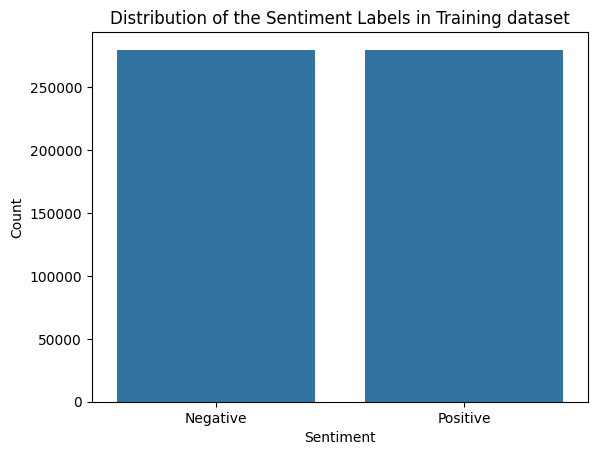

In [ ]:
# let's show the distribution of our target variable which is sentiment

sns.countplot(x='label', data=trn_dt)
plt.title('Distribution of the Sentiment Labels in Training dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()



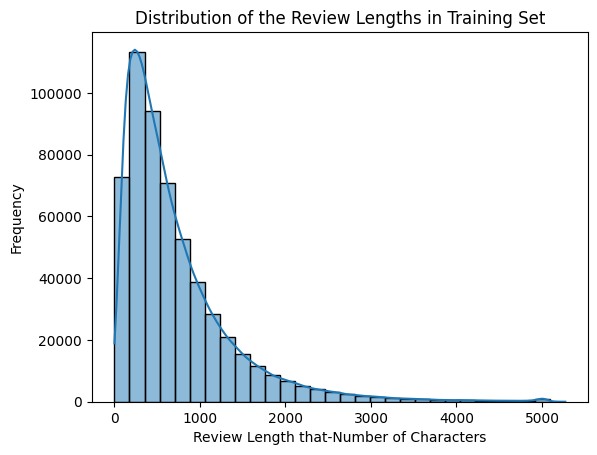

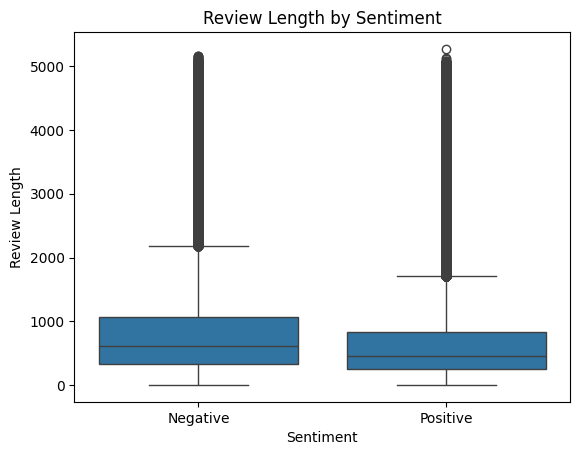

In [ ]:
# let us review the length analysis

# first, we calculate the length of each review
trn_dt['review_length'] = trn_dt['text'].apply(len)

# showing the distribution of the review lengths
sns.histplot(trn_dt['review_length'], kde=True, bins=30)
plt.title('Distribution of the Review Lengths in Training Set')
plt.xlabel('Review Length that-Number of Characters')
plt.ylabel('Frequency')
plt.show()

# Comparing the  review lengths across the sentiment categories
sns.boxplot(x='label', y='review_length', data=trn_dt)
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()


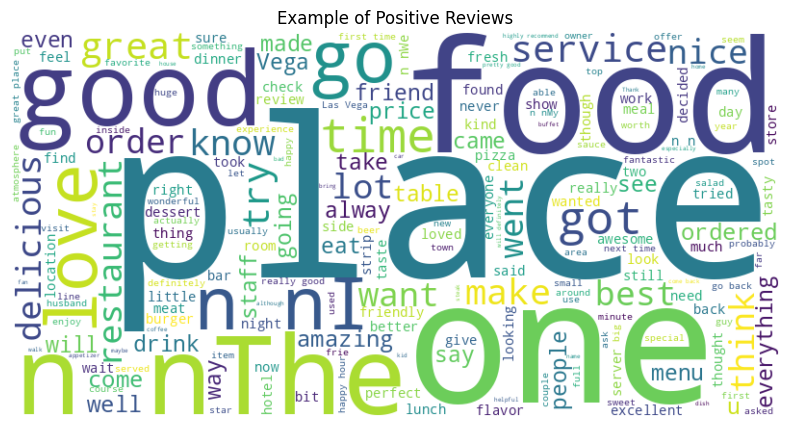

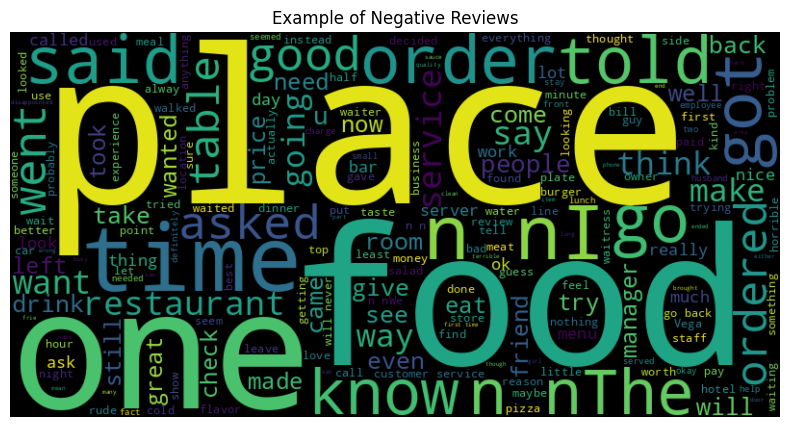

In [ ]:
# we will show some of the most common words in the review using word clouds

positive_reviews = ' '.join(trn_dt[trn_dt['label'] == 1]['text'])
negative_reviews = ' '.join(trn_dt[trn_dt['label'] == 0]['text'])

# positive reviews
wordcloud_pst = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pst, interpolation='bilinear')
plt.title('Example of Positive Reviews')
plt.axis('off')
plt.show()

# negative reviews
wordcloud_ngt = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ngt, interpolation='bilinear')
plt.title('Example of Negative Reviews')
plt.axis('off')
plt.show()


**4. Data Preprocessing**

The Hugging Face transformers library's BERT tokenizer will be used to tokenize the text data. A crucial stage in natural language processing is tokenisation, which turns text into understandable tokens for models. According to Devlin et al. (2019), BERT's tokeniser is made to efficiently capture context and handle a range of text lengths.
The Tokenized text will be converted into numerical values in order to facilitate model training. Ensuring that the data conforms to the expected input format of the BERT model is a fundamental step in data preprocessing.


In [ ]:
# let us start with tokenization with BERT tokenizer

# first, we will be Initializing the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:

# Defining a function
def tokenize_data(texts, labels, max_length=256):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )

        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels)

    return input_ids, attention_masks, labels

# Tokenize the training data
train_texts = trn_dt['text'].values
train_labels = trn_dt['label'].values

input_ids, attention_masks, labels = tokenize_data(train_texts, train_labels)
